# desc-wfmon/fundata.ipynb: Viewing parsl function data

We use the classe *FunctionData* in desc-wfmon to examine task state transitions in parsl running.

Copy this file to the run directory or add the appropriate argument where the class is constructed.

First setup to use the local install area and then import the the system (sysmon) and process (wfmon) explorers. 

See desc-wfmon/install.ipynb to install that package in the local directory and create the setup on the first line. 

In [1]:
!pwd
%run install/setup.py
import sys
print(f"Python version is {sys.version}")
print(f"Python search path starts with {sys.path[0]}:{sys.path[1]}:{sys.path[2]}")
import pandas
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import desc.wfmon
for pkg in [desc.wfmon]:
    print(f"{pkg} version is {pkg.__version__}")

/global/u2/d/dladams/desc/rundirs/ptest05
Python version is 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
Python search path starts with ./install/noconda:/global/u2/d/dladams/desc/rundirs/ptest05:
TestMonDbReader:ctor: Done.
<module 'desc.wfmon' from '/global/u2/d/dladams/desc/rundirs/ptest05/./install/noconda/desc/wfmon/__init__.py'> version is 0.0.16.dev2


## Configuration
Configure matplotlib to pretty-up the plots, define their size and aspect ratio and add a label. If undefined, the latter is taken from the current directory name.

In [5]:
plt.rc('font', size=16)
plt.rc('savefig', facecolor='white', bbox='tight')
plt.rc('axes', titlesize='medium')

pdx = 20
pdy = 5

label = None
if label is None:
    label = os.path.basename(os.getcwd())
print(f"Label: {label}")

Label: ptest05


## Fetch data
We create a *FunctionData* object that reads the function data logs annd contructs a dataframe with the time at which each task enters a series of processing states (column names). No arguments are needed if this notebook is run from the production directory and the logs are in their expected loctions.

In [3]:
fda = desc.wfmon.FunctionData()
print(fda.data)

    taskid              start         postimport          mainstart  \
0      2.0  1647371405.410544  1647371488.956162  1647371488.956167   
1      3.0  1647371406.113718  1647371493.531129  1647371493.531134   
2      4.0  1647371406.116491  1647371493.477909  1647371493.477913   
3      5.0  1647371405.395503  1647371490.547034  1647371490.547039   
4      6.0   1647371405.43444  1647371488.735765   1647371488.73577   
..     ...                ...                ...                ...   
380  712.0  1647373812.875145  1647373929.987809  1647373929.987815   
381  713.0  1647373834.524367  1647373947.212223   1647373947.21223   
382  714.0  1647373861.741012  1647373972.929474   1647373972.92948   
383  715.0  1647373875.585213  1647373985.062601  1647373985.062607   
384  716.0  1647373877.639335   1647373987.41735  1647373987.417354   

          loadfunction    executefunction               dump  \
0    1647371488.956213  1647371600.627458  1647371657.927797   
1    1647371493.531

## Create plots.

We create plots showing the distribution of times for which the task stays in each state by plotting the difference between times entering the subsequent and current state.

ptest05
['start', 'postimport', 'mainstart', 'loadfunction', 'executefunction', 'dump', 'done']


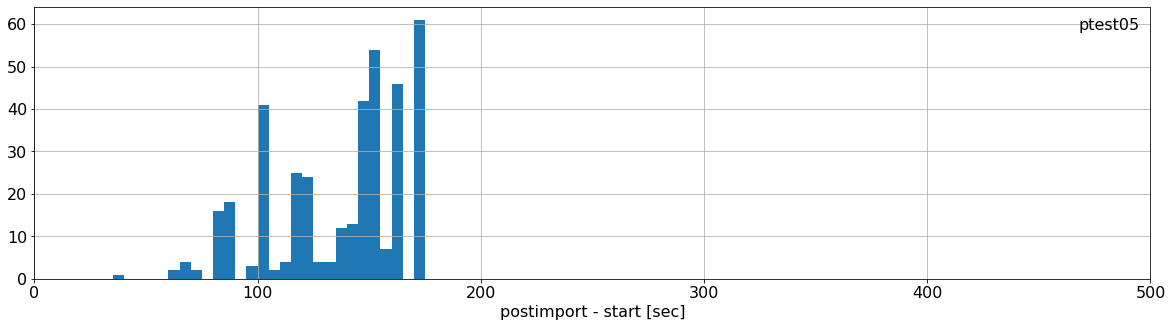

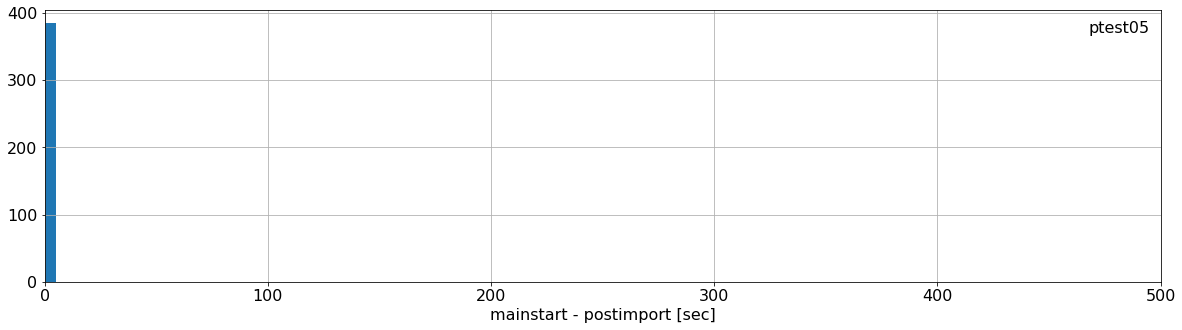

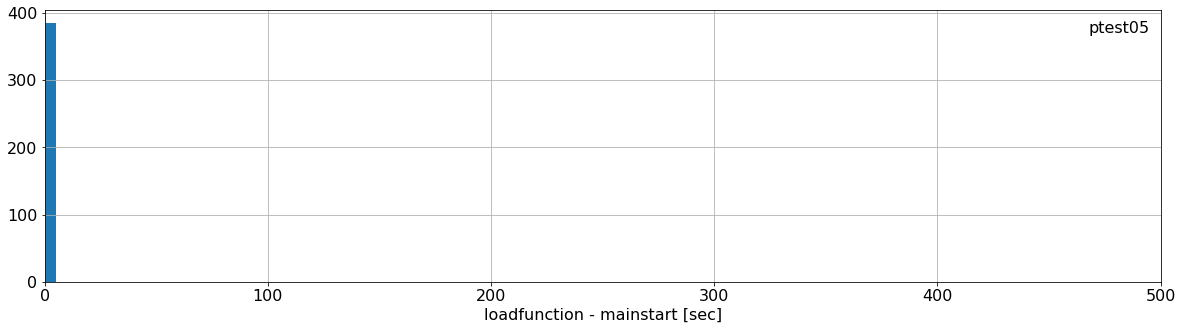

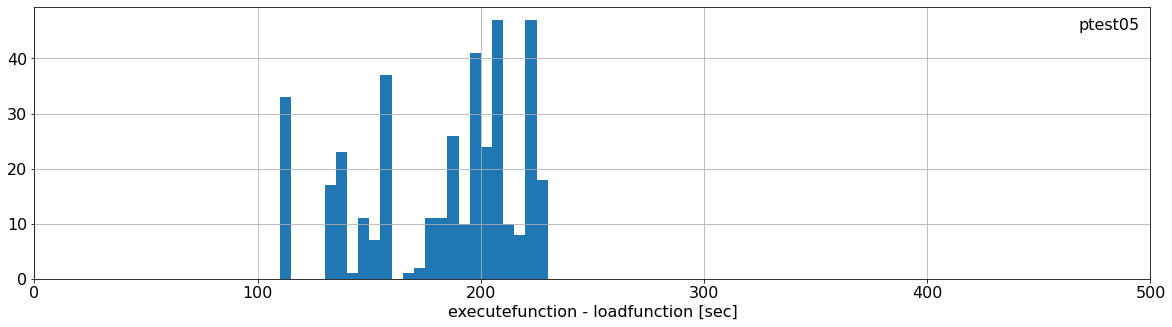

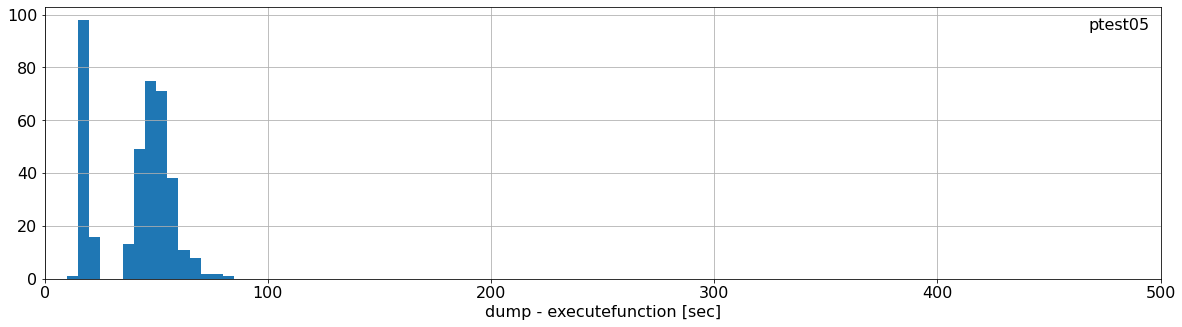

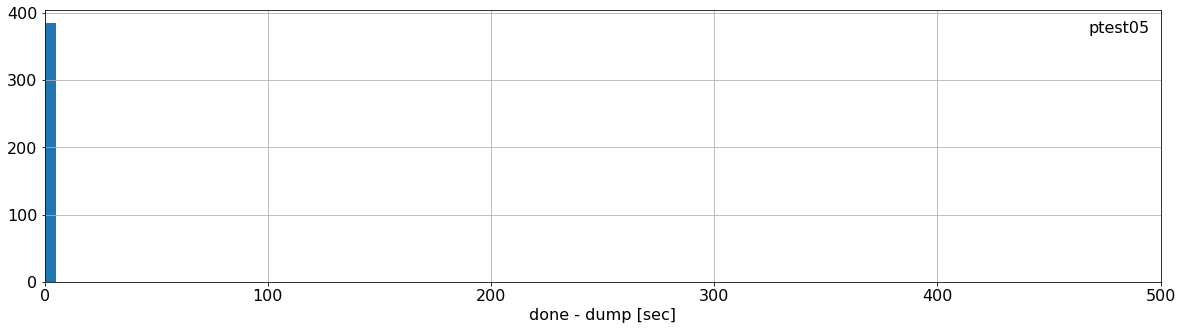

In [14]:
sdir = os.path.basename(os.getcwd())
print(sdir)
nbin = 100
t1 = 0.0
t2 = 500.0
delt = 1.e-5*(t2-t1)
cols = list(fda.data.columns)[1:]
print(cols)
c12s = []
for icol in range(len(cols)-1):
    c12s.append([cols[icol], cols[icol+1]])
# Uncomment the following to look at other time differences.
#c12s = [['start', 'done'], ['loadfunction', 'executefunction'], ['start', 'loadfunction']]
for [c1, c2] in c12s:
    plt.figure(figsize=(pdx, pdy))
    dif = (fda.data[c2] - fda.data[c1]).clip(lower=t1+delt, upper=t2-delt)
    plt.hist(bins=nbin, range=[t1,t2], x=dif)
    plt.xlabel(f"{c2} - {c1} [sec]")
    plt.grid(True)
    plt.xlim(t1, t2)
    plt.text(0.99, 0.96, label, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
    plt.savefig(f"{sdir}-{c1}-{c2}.png")
    plt.show()